In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import string
from datetime import datetime
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [4]:
#Append path with python modules
import importlib
import sys
sys.path.append("./modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf)

import emnist_functions_2 as emnist_fcn
importlib.reload(emnist_fcn)

<module 'emnist_functions_2' from '/content/emnist_functions_2.py'>

In [5]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=be584698987dc1d5db60cc8817fe9a5bc942159dfe56f4c6c5078cffb5f4d6e6
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


 Download [EMNIST](https://www.google.com/url?q=https%3A%2F%2Fbiometrics.nist.gov%2Fcs_links%2FEMNIST%2Fgzip.zip) dataset

In [6]:
!wget https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip

--2025-06-25 14:27:59--  https://biometrics.nist.gov/cs_links/EMNIST/gzip.zip
Resolving biometrics.nist.gov (biometrics.nist.gov)... 172.65.90.27, 172.65.90.25, 172.65.90.24, ...
Connecting to biometrics.nist.gov (biometrics.nist.gov)|172.65.90.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 561753746 (536M) [application/zip]
Saving to: ‘gzip.zip’

gzip.zip            100%[===================>] 535.73M   168MB/s    in 4.9s    

2025-06-25 14:28:05 (110 MB/s) - ‘gzip.zip’ saved [561753746/561753746]



In [7]:
!unzip gzip.zip

Archive:  gzip.zip
  inflating: gzip/emnist-balanced-mapping.txt  
  inflating: gzip/emnist-balanced-test-images-idx3-ubyte.gz  
 extracting: gzip/emnist-balanced-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-balanced-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-balanced-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-mapping.txt  
  inflating: gzip/emnist-byclass-test-images-idx3-ubyte.gz  
  inflating: gzip/emnist-byclass-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-byclass-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-byclass-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-bymerge-mapping.txt  
  inflating: gzip/emnist-bymerge-test-images-idx3-ubyte.gz  
  inflating: gzip/emnist-bymerge-test-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-bymerge-train-images-idx3-ubyte.gz  
  inflating: gzip/emnist-bymerge-train-labels-idx1-ubyte.gz  
  inflating: gzip/emnist-digits-mapping.txt  
  inflating: gzip/emnist-digits-test-images-idx3-ub

In [8]:
!gzip -d gzip/*.gz

Training data shapes: (30000, 28, 28) (30000,)
Validation data shapes: (10000, 28, 28) (10000,)


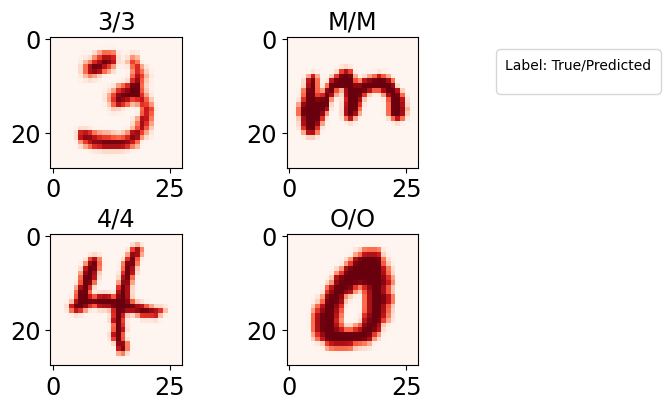

In [10]:
datasetPath = "./gzip"

features_train, labels_train = emnist_fcn.getEMNIST("emnist-byclass-train", datasetPath)
features_val, labels_val = emnist_fcn.getEMNIST("emnist-byclass-test", datasetPath)

mask_train = labels_train < 36
mask_val = labels_val < 36

nTrainExamples = 30000
nValExamples = 10000

x_train = features_train[mask_train][:nTrainExamples]
y_train = labels_train[mask_train][:nTrainExamples]

x_val = features_val[mask_val][:nValExamples]
y_val = labels_val[mask_val][:nValExamples]

print("Training data shapes:", x_train.shape, y_train.shape)
print("Validation data shapes:", x_val.shape, y_val.shape)

emnist_fcn.plotMNIST(x_train, y_train, y_train)

pass

[(0, np.int64(128)), (1, np.int64(128)), (2, np.int64(128))]


Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_0 (Conv2D)                │ (None, 26, 26, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_1 (Conv2D)                │ (None, 11, 11, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Conv2D)                │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301,092 (1.15 MB)

 Trainable params: 301,092 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 10: early stopping
Evaluation on training dataset:
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Accuracy: 0.9351 - loss: 0.1592
Evaluation on validation dataset
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Accuracy: 0.8829 - loss: 0.3599
CPU times: user 28.7 s, sys: 2.51 s, total: 31.2 s
Wall time: 59.6 s


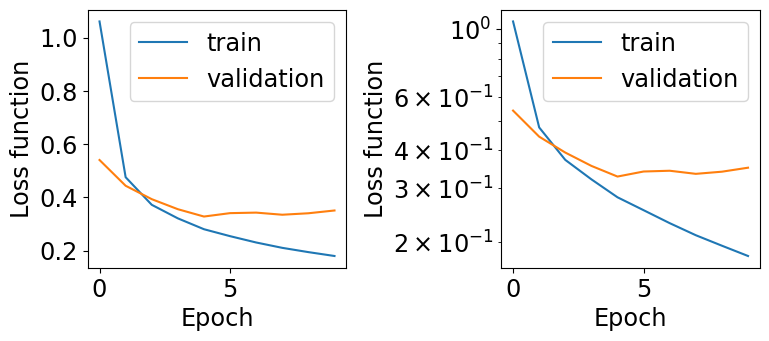

In [11]:
%%time

inputShape = (28, 28, 1)
nNeurons = np.full((3), 128)
nOutputNeurons = 36

print(list(enumerate(nNeurons)))

def getModel(inputShape, nNeurons, hiddenActivation = "relu", outputActivation = "linear", nOutputNeurons = 1):
  model = tf.keras.Sequential(name = "DNN")

  model.add( tf.keras.Input(shape = inputShape, name = "features") )

  for iLayer, n in enumerate(nNeurons):
    model.add( tf.keras.layers.Conv2D(n, (3), activation = hiddenActivation, bias_initializer = tf.keras.initializers.RandomUniform(minval = -1, maxval = 1), kernel_initializer = "HeNormal", name = "layer_" + str(iLayer)) )
    model.add( tf.keras.layers.MaxPooling2D(2) )

  model.add( tf.keras.layers.Flatten() )

  model.add( tf.keras.layers.Dense(nOutputNeurons, activation = outputActivation, name = "output") )

  model.summary()

  return model

model = getModel(inputShape = inputShape, nOutputNeurons = nOutputNeurons, nNeurons = nNeurons, hiddenActivation = "relu", outputActivation = "softmax")

#Configure learning process
initial_learning_rate = 1E-3
batchSize = 64
nEpochs = 50

nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps = nStepsPerEpoch*10, decay_rate = 0.95, staircase = False)

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr_schedule), loss = "sparse_categorical_crossentropy", metrics = ['Accuracy'])

#Run_training
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1, min_delta = 1E-3)
callbacks = [early_stop_callback]

history = model.fit(x = x_train, y = y_train, epochs = nEpochs, batch_size = batchSize, validation_data = (x_val, y_val), callbacks = callbacks, verbose = 0)

plf.plotTrainHistory(history)

print("Evaluation on training dataset:")
model.evaluate(x_train, y_train)

print("Evaluation on validation dataset")
model.evaluate(x_val, y_val)

pass

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


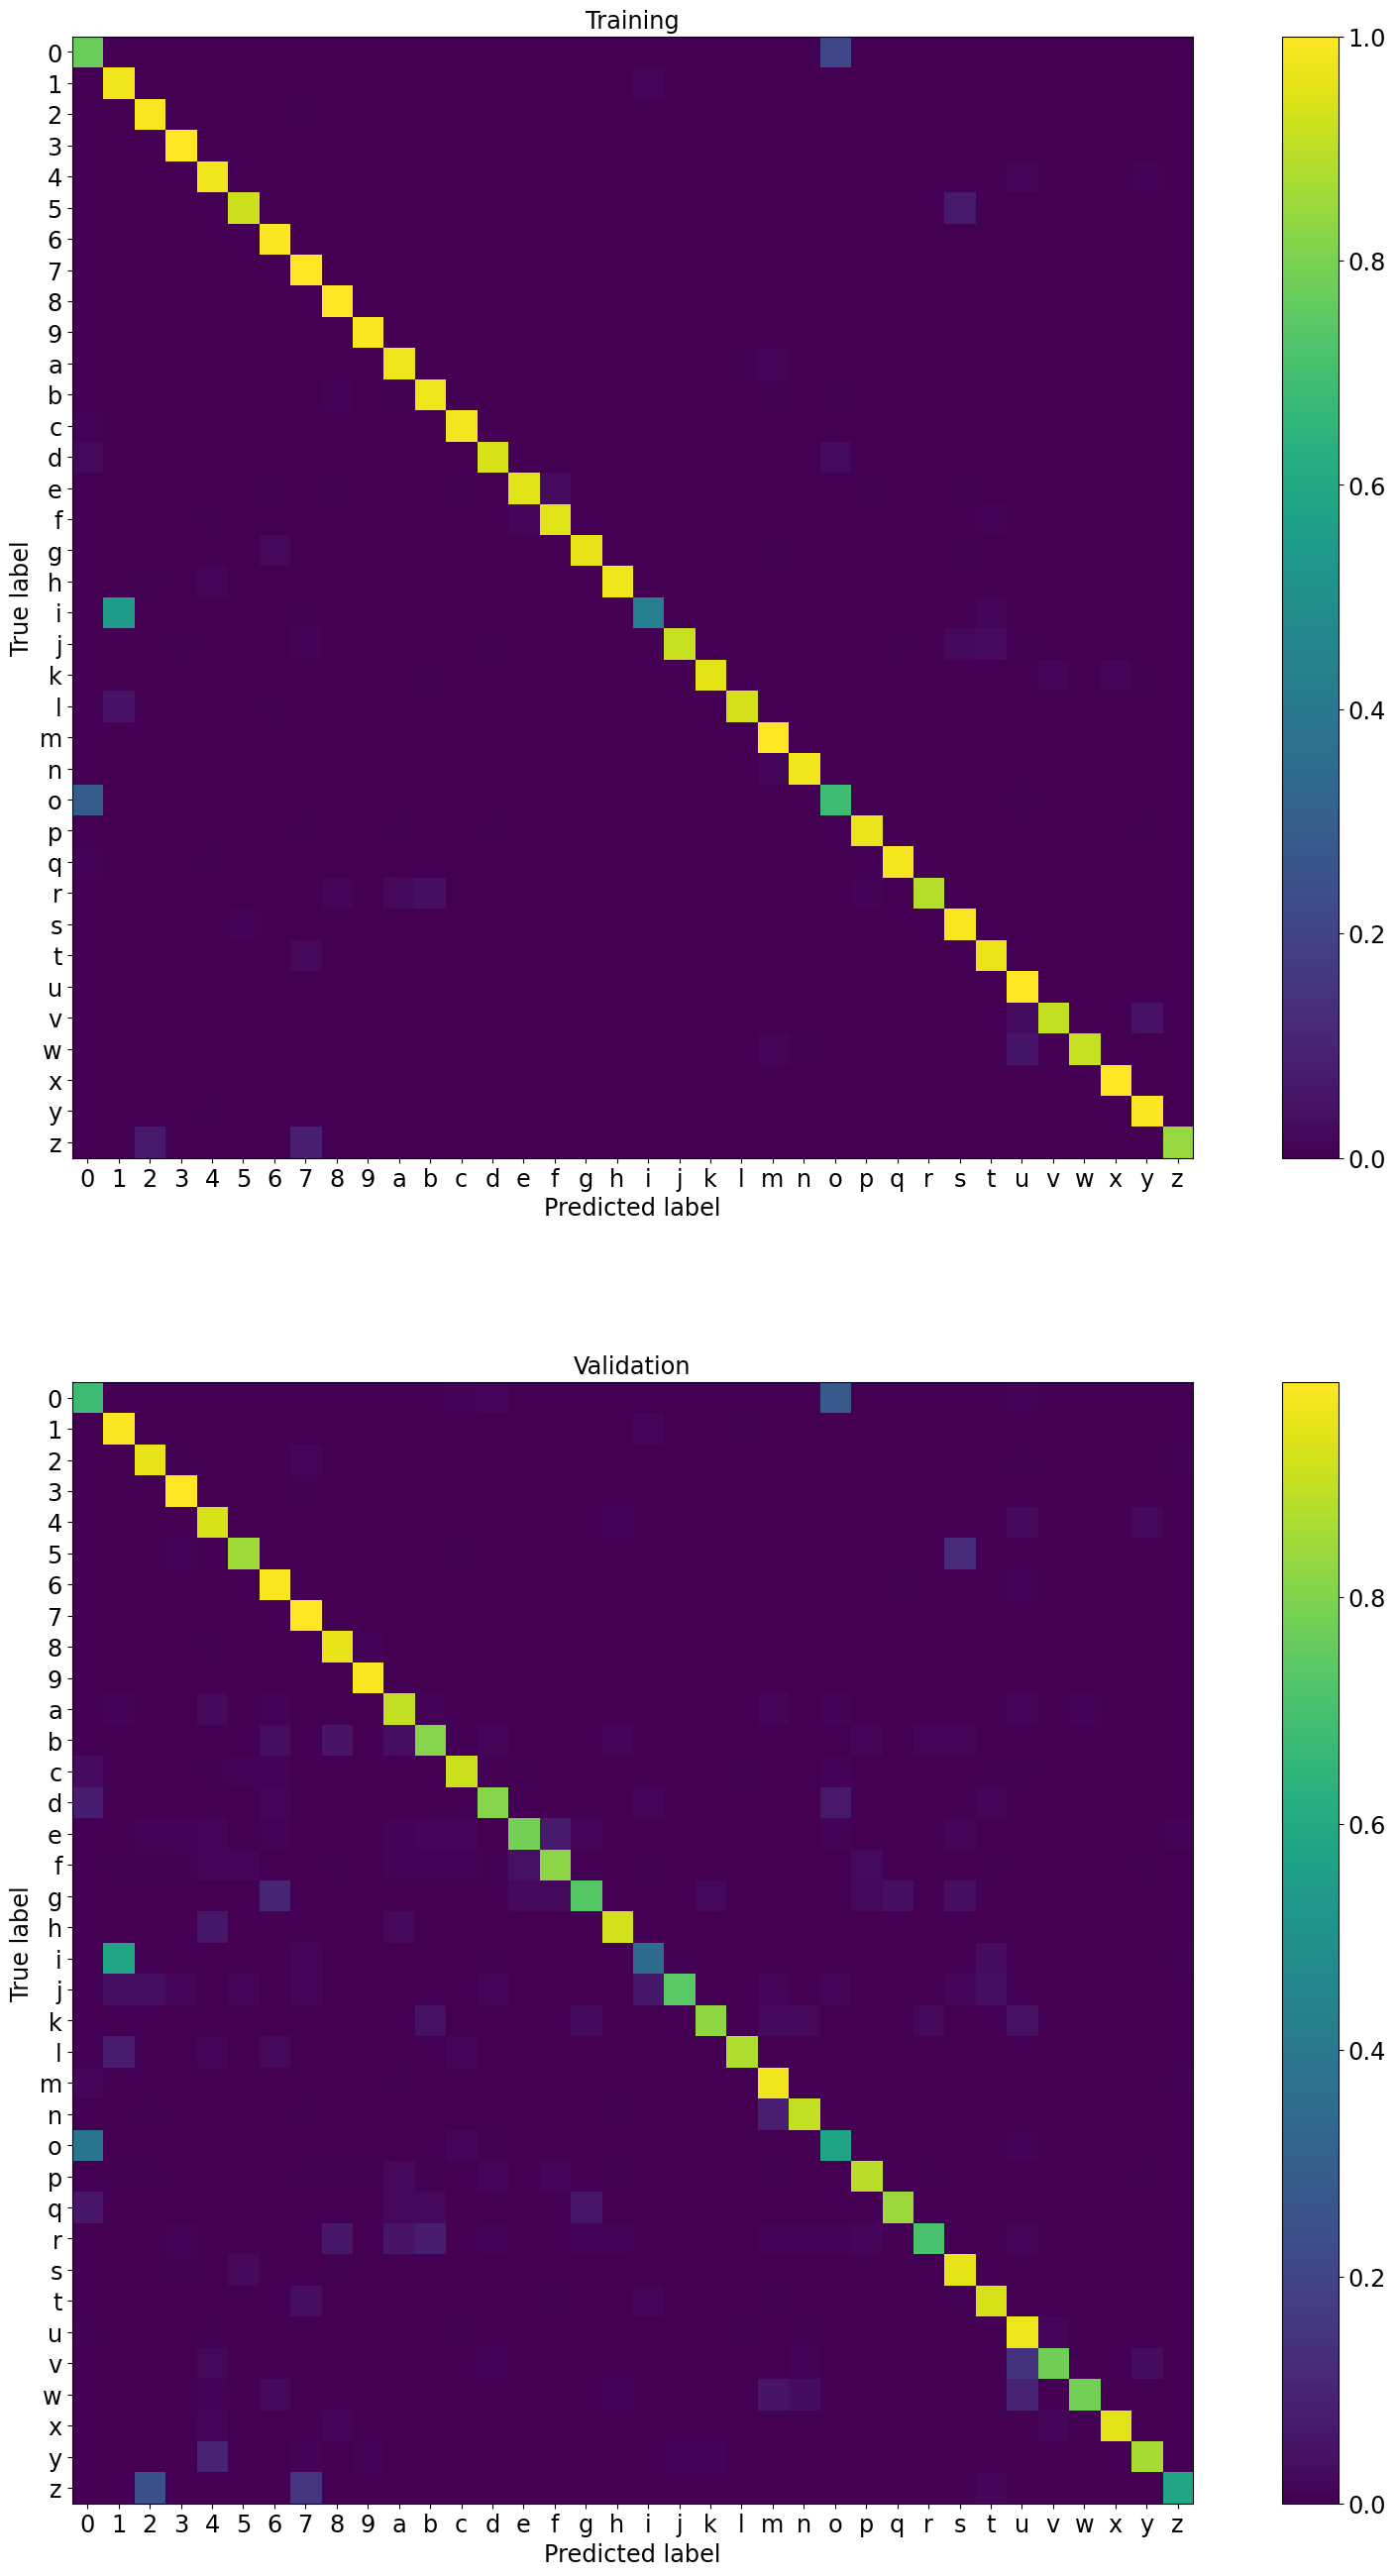

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

fig, axes = plt.subplots(2, 1, figsize = (20, 30))

y_pred = tf.argmax(model.predict(x_train), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred, normalize = "true", ax = axes[0], include_values = False, values_format = '.2f', display_labels = class_names)

y_pred = tf.argmax(model.predict(x_val), axis = 1)
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize = "true", ax = axes[1], include_values = False, values_format = '.2f', display_labels = class_names)

axes[0].set_title("Training")
axes[1].set_title("Validation")

plt.subplots_adjust(bottom = 0.05, left = 0.05, right = 0.95, wspace = 0.1, hspace = 0.2)

pass

Incorectly identified examples

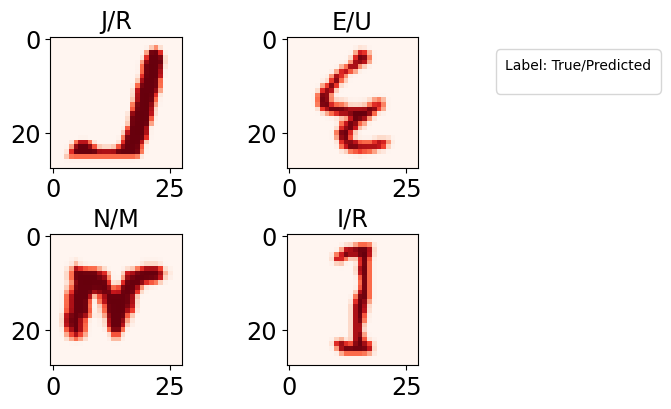

In [14]:
mask = y_val != y_pred

emnist_fcn.plotMNIST(x_val[mask], y_val[mask], y_pred[mask])

pass

The classes that usually separate the weakest (though that depends on the particular run) are "z"-"2", "i"-"1" and "o"-"0". This behavior is somewhat expected as these letters and numbers are often written in the same way by people so it is hard to sometimes distinguish them.

Decoding example text

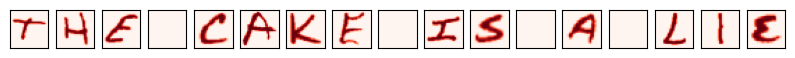

In [16]:
fileName = "./encoded.npz"

with open(fileName, 'rb') as file:
  encoded = np.load(file)

fig, axes = plt.subplots(1, len(encoded), figsize = (10, 10))

for i in range(len(encoded)):
  axes[i].imshow(encoded[i].T, cmap = plt.get_cmap("Reds"))
  axes[i].set_xticks([])
  axes[i].set_yticks([])

In [17]:
y_pred = tf.argmax(model.predict(encoded), axis = 1)

decoded_message = []

for i in range(len(y_pred)):
  decoded_message.append(class_names[y_pred[i]])

print("Decoded message is:", "".join(decoded_message))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
Decoded message is: thejcakfjisjajl1e


The model couldn't decode message properly probably because it contains only big letters as well as spaces which were absent in my training data.